# 1. Sıcaklık Tahmini


Bu alıştırmada, Szeged, Macaristan bölgesindeki tarihi sıcaklık verileriyle çalışacaksınız.

* Öncelikle, Sıcaklık verilerini Kaggle'dan indirin.
* Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.
* Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

from scipy.stats import jarque_bera
from scipy.stats import normaltest

import warnings
warnings.filterwarnings('ignore')

In [2]:
weather = pd.read_csv('/home/buket/Jupyter/Data/szeged-weather/weatherHistory.csv')
weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
def null_values(df):
    null_value=pd.DataFrame()
    null_value['yüzde']=df.isnull().sum()*100/df.shape[0]
    null_value['adet']=df.isnull().sum()
    return null_value.sort_values('yüzde',ascending=False)
null_values(weather)

,yüzde,adet
Precip Type,0.536012,517
Formatted Date,0.000000,0
Summary,0.000000,0
Temperature (C),0.000000,0
Apparent Temperature (C),0.000000,0
Humidity,0.000000,0
Wind Speed (km/h),0.000000,0
Wind Bearing (degrees),0.000000,0
Visibility (km),0.000000,0
Loud Cover,0.000000,0


In [5]:
weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [6]:
weather["Temperature (C)"].head()

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature (C), dtype: float64

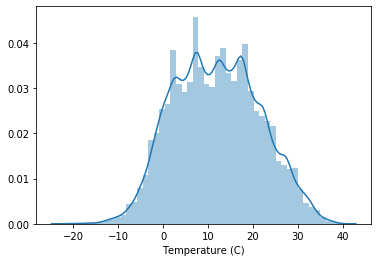

In [7]:
sns.distplot(weather["Temperature (C)"]);

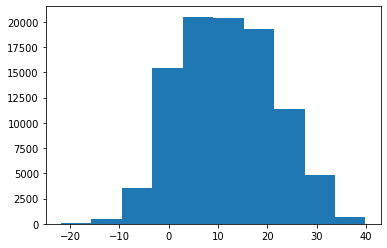

In [8]:
plt.hist(weather['Temperature (C)'])
plt.show()

In [9]:
new_list = ["Temperature (C)","Humidity","Pressure (millibars)","Wind Speed (km/h)","Wind Bearing (degrees)"]

In [10]:
for i in new_list:
    print("{} sütunundaki benzersiz değişkenler:\n {} \n\n ".format(i,weather[i].unique()))

Temperature (C) sütunundaki benzersiz değişkenler:
 [ 9.47222222  9.35555556  9.37777778 ... 28.47222222 28.33888889
 30.60555556] 

 
Humidity sütunundaki benzersiz değişkenler:
 [0.89 0.86 0.83 0.85 0.95 0.82 0.72 0.67 0.54 0.55 0.51 0.47 0.46 0.6
 0.63 0.69 0.7  0.77 0.76 0.79 0.62 0.66 0.8  0.78 0.61 0.52 0.4  0.37
 0.36 0.43 0.5  0.53 0.58 0.59 0.87 0.93 0.84 0.73 0.71 0.74 0.81 0.9
 0.99 0.96 0.75 0.88 0.65 0.91 0.94 0.92 0.44 0.56 0.68 0.64 0.48 0.57
 0.98 1.   0.38 0.41 0.45 0.49 0.32 0.42 0.35 0.39 0.97 0.34 0.33 0.31
 0.3  0.29 0.27 0.28 0.26 0.24 0.25 0.23 0.19 0.17 0.2  0.15 0.18 0.22
 0.14 0.21 0.16 0.13 0.   0.12] 

 
Pressure (millibars) sütunundaki benzersiz değişkenler:
 [1015.13 1015.63 1015.94 ...  998.11  998.52  997.59] 

 
Wind Speed (km/h) sütunundaki benzersiz değişkenler:
 [14.1197 14.2646  3.9284 ... 37.0622 35.5971 30.751 ] 

 
Wind Bearing (degrees) sütunundaki benzersiz değişkenler:
 [251. 259. 204. 269. 258. 260. 279. 290. 316. 281. 289. 262. 288. 230.
 16

In [11]:
Y = weather['Temperature (C)']
X = weather[["Humidity","Pressure (millibars)","Wind Speed (km/h)","Wind Bearing (degrees)"]]

In [12]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.24962454e+01 -6.91759209e-04 -2.01413742e-01  4.04836936e-03]
Sabit değer (bias): 
 37.92643818528537


In [14]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:19:51   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hata terimi ortalamada sıfır olmalıdır

In [15]:
X = weather[["Humidity","Pressure (millibars)","Wind Speed (km/h)","Wind Bearing (degrees)"]]

tahmin = lrm.predict(X)
hatalar = Y - tahmin

print("Weather modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))

Weather modelinin ortalama hatası : -0.000000000000004


Varsayım 3: homoscedasticity

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


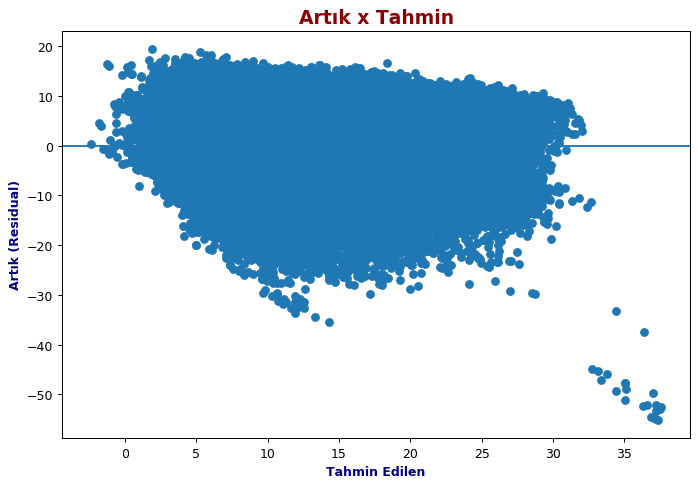

In [16]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

plt.figure(figsize=(9,6), dpi=90)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

In [17]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 2464.84 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2321.24 ve p değeri : 0.000000000000000000000


Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır

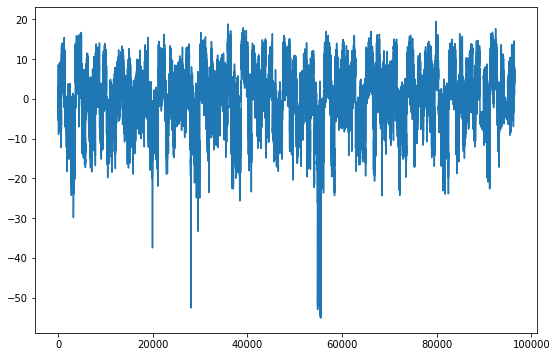

In [18]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

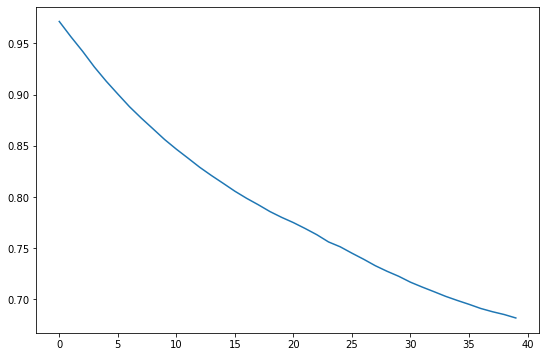

In [19]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

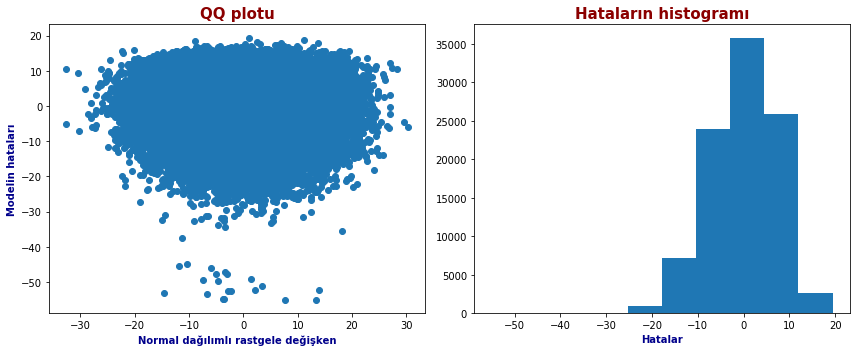

In [20]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [21]:
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 3793.2967352523533 ve p değeri : 0.0
Normal test değeri      : 3375.4323076995756  ve p değeri : 0.000000000000000000000000000000
